In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch03 군집합</font></b>

# 1. 데이터 생성
- 남자, 여자의 키와 몸무게 데이터를 군집화

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
random.randint(40,95) #40부터 95까지의 정수 중 하나를 무작위 선택 반환 

51

In [7]:
data= []
for i in range(50):
    #여자데이터
    data.append([random.randint(40,70),random.randint(140,170)])
    #남자데이터
    data.append([random.randint(60,95),random.randint(160,195)])
#data

    

[[64, 142],
 [81, 163],
 [65, 156],
 [68, 181],
 [69, 166],
 [92, 167],
 [66, 141],
 [83, 167],
 [50, 153],
 [78, 194],
 [67, 140],
 [64, 194],
 [59, 141],
 [69, 170],
 [61, 140],
 [74, 179],
 [40, 158],
 [93, 186],
 [45, 165],
 [66, 179],
 [54, 169],
 [70, 183],
 [63, 162],
 [91, 170],
 [54, 169],
 [78, 174],
 [60, 140],
 [69, 179],
 [64, 170],
 [78, 170],
 [56, 148],
 [83, 176],
 [66, 163],
 [92, 192],
 [43, 169],
 [87, 182],
 [64, 149],
 [89, 160],
 [64, 157],
 [90, 167],
 [67, 160],
 [67, 180],
 [45, 149],
 [82, 187],
 [56, 141],
 [75, 175],
 [68, 140],
 [75, 181],
 [44, 170],
 [88, 170],
 [48, 150],
 [60, 163],
 [61, 161],
 [62, 194],
 [47, 149],
 [95, 176],
 [50, 152],
 [71, 190],
 [67, 156],
 [94, 168],
 [65, 169],
 [92, 173],
 [61, 153],
 [82, 183],
 [47, 140],
 [61, 160],
 [47, 166],
 [94, 195],
 [47, 154],
 [90, 182],
 [59, 146],
 [93, 177],
 [54, 147],
 [86, 187],
 [57, 162],
 [64, 187],
 [68, 154],
 [78, 181],
 [50, 145],
 [70, 195],
 [49, 146],
 [83, 167],
 [50, 150],
 [94

In [10]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
# 남자
print('\n-------------------------------')
for male in data[1:100:2]:
    print(male, end=' ')

[64, 142] [65, 156] [69, 166] [66, 141] [50, 153] [67, 140] [59, 141] [61, 140] [40, 158] [45, 165] [54, 169] [63, 162] [54, 169] [60, 140] [64, 170] [56, 148] [66, 163] [43, 169] [64, 149] [64, 157] [67, 160] [45, 149] [56, 141] [68, 140] [44, 170] [48, 150] [61, 161] [47, 149] [50, 152] [67, 156] [65, 169] [61, 153] [47, 140] [47, 166] [47, 154] [59, 146] [54, 147] [57, 162] [68, 154] [50, 145] [49, 146] [50, 150] [67, 162] [52, 148] [40, 148] [48, 146] [64, 158] [52, 144] [58, 149] [47, 165] 
-------------------------------
[81, 163] [68, 181] [92, 167] [83, 167] [78, 194] [64, 194] [69, 170] [74, 179] [93, 186] [66, 179] [70, 183] [91, 170] [78, 174] [69, 179] [78, 170] [83, 176] [92, 192] [87, 182] [89, 160] [90, 167] [67, 180] [82, 187] [75, 175] [75, 181] [88, 170] [60, 163] [62, 194] [95, 176] [71, 190] [94, 168] [92, 173] [82, 183] [61, 160] [94, 195] [90, 182] [93, 177] [86, 187] [64, 187] [78, 181] [70, 195] [83, 167] [94, 173] [63, 192] [94, 184] [79, 166] [64, 163] [66, 16

In [11]:
print('여자 몸무게 :',[d[0] for d in data[::2]] )
print('여자 키 :',    [d[1] for d in data[::2]] )
print('남자 몸무게 :',[d[0] for d in data[1::2]] )
print('남자 키 :',    [d[1] for d in data[1::2]] )

여자 몸무게 : [64, 65, 69, 66, 50, 67, 59, 61, 40, 45, 54, 63, 54, 60, 64, 56, 66, 43, 64, 64, 67, 45, 56, 68, 44, 48, 61, 47, 50, 67, 65, 61, 47, 47, 47, 59, 54, 57, 68, 50, 49, 50, 67, 52, 40, 48, 64, 52, 58, 47]
여자 키 : [142, 156, 166, 141, 153, 140, 141, 140, 158, 165, 169, 162, 169, 140, 170, 148, 163, 169, 149, 157, 160, 149, 141, 140, 170, 150, 161, 149, 152, 156, 169, 153, 140, 166, 154, 146, 147, 162, 154, 145, 146, 150, 162, 148, 148, 146, 158, 144, 149, 165]
남자 몸무게 : [81, 68, 92, 83, 78, 64, 69, 74, 93, 66, 70, 91, 78, 69, 78, 83, 92, 87, 89, 90, 67, 82, 75, 75, 88, 60, 62, 95, 71, 94, 92, 82, 61, 94, 90, 93, 86, 64, 78, 70, 83, 94, 63, 94, 79, 64, 66, 61, 67, 65]
남자 키 : [163, 181, 167, 167, 194, 194, 170, 179, 186, 179, 183, 170, 174, 179, 170, 176, 192, 182, 160, 167, 180, 187, 175, 181, 170, 163, 194, 176, 190, 168, 173, 183, 160, 195, 182, 177, 187, 187, 181, 195, 167, 173, 192, 184, 166, 163, 162, 162, 163, 193]


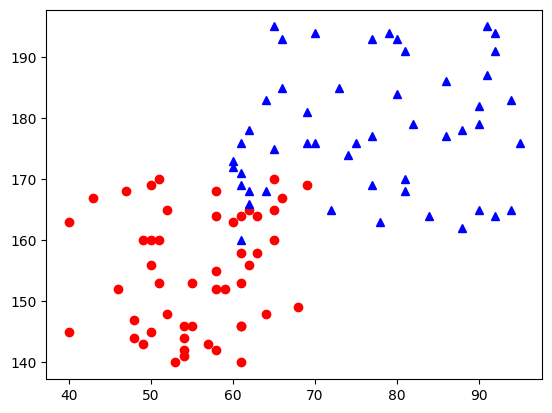

In [32]:
# print('여자 몸무게 :',[d[0] for d in data[::2]] )
# print('여자 키 :',    [d[1] for d in data[::2]] )
# print('남자 몸무게 :',[d[0] for d in data[1::2]] )
# print('남자 키 :',    [d[1] for d in data[1::2]] )
# for d in data[::2]:
#     plt.plot(d[0], d[1], 'o', color='r')
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'o', color='r')
plt.plot([d[0] for d in data[1::2]],
        [d[1] for d in data[1::2]], '^', color='b')

# 2.군집화 로직

In [13]:
# 초기 랜덤지점 2개
random_points = [[random.randint(40, 95), random.randint(140, 195)],
                 [random.randint(40, 95), random.randint(140, 195)]]
random_points

[[64, 190], [69, 191]]

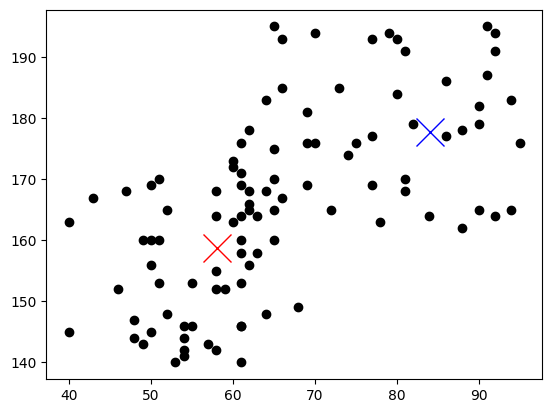

In [31]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0], 
         random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0], 
         random_points[1][1], 'x', color='b', markersize=20) # 기준점2

In [15]:
# 두 점의 거리를 return a:(0,0) ~ b:(4,3)
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2  + (a[1]-b[1])**2 )

In [16]:
a = [1, 0]; b= [4, 3]
dist(a, b)

4.242640687119285

In [17]:
# random_points[0]과 random_points[1]을 기준으로 나눈 두 영역
group1 = [] # random_points[0]이 가까운 그룹
group2 = [] # random_points[1]이 가까운 그룹
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group1.append(d) # 빨간X랑 더 가까운 그룹
    else:
        group2.append(d) # 파란 X랑 더 가까운 그룹
len(group1), len(group2)

(65, 35)

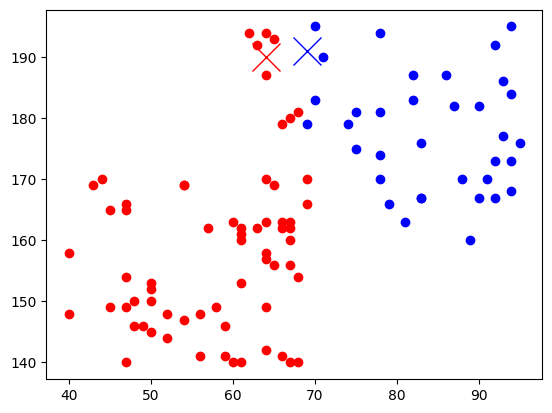

In [18]:
# 새로운 그룹 group1과 group2, 초기 램던 지점
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='r')
plt.plot([d[0] for d in group2],
        [d[1] for d in group2], 'o', color='b')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=20) # 기준점1
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=20) # 기준점2
plt.show()

In [19]:
# 기준점 이동 group1의 중심점, group2중심점
sumX=0 ; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[0] = [sumX/len(group1), sumY/len(group1)]
sumX=0 ; sumY=0
for g in group2:
    sumX += g[0]
    sumY += g[1]
# 새로운 기준점으로 할당
random_points[1] = [sumX/len(group2), sumY/len(group2)]
random_points

[[58.09230769230769, 158.7846153846154],
 [84.08571428571429, 177.68571428571428]]

# 3. 전체코드(for문이용)
- data todtjd
- 랜덤포인트2지점
- for 문
    - 랜덤포인트 2지점기준으로 group1과 group2
    - 랜덤포인트 이용(group1중간점, group2 중간점)

초기 points :  [[55, 182], [54, 174]]
1 번째 points :  [[80.03703703703704, 185.5185185185185], [61.054794520547944, 159.21917808219177]]
2 번째 points :  [[81.05405405405405, 180.64864864864865], [57.44444444444444, 157.9047619047619]]
3 번째 points :  [[80.1, 180.0], [56.9, 157.2]]
4 번째 points :  [[79.82926829268293, 179.73170731707316], [56.69491525423729, 157.0]]
5 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]
6 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]
7 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]
8 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]
9 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]
10 번째 points :  [[79.20930232558139, 179.30232558139534], [56.35087719298246, 156.52631578947367]]


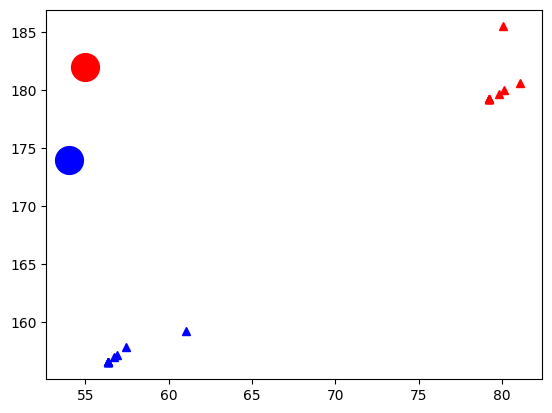

In [30]:
# 데이터 생성
data = []
for i in range(50):
    # 여자 데이터
    data.append([random.randint(40,70), random.randint(140,170)])
    # 남자 데이터
    data.append([random.randint(60,95), random.randint(160,195)])
# point 지정
points = [[random.randint(40,95), random.randint(140,195)],
          [random.randint(40,95), random.randint(140,195)]]
print("초기 points : ", points)
plt.plot(points[0][0], points[0][1], 'o', c='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'o', c='b', markersize=20)
# 포인트 2지점기준으로 group1과 group2
for i in range(1, 11):
    group1 = [] # points[0]과 가까운 그룹
    group2 = [] # points[1]과 가까운 그룹
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group1.append(d)
        else:
            group2.append(d)
    # 새로운 포인트로 할당
    sumX = 0; sumY=0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points[0] = [sumX/len(group1), sumY/len(group1)]
    sumX = 0; sumY=0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    points[1] = [sumX/len(group2), sumY/len(group2)]
    print(i, "번째 points : ", points)
    plt.plot(points[0][0], points[0][1], '^', c='r')
    plt.plot(points[1][0], points[1][1], '^', c='b')

# 4.api(sklearn)를 이용한 군집화
- sklearn 머신러닝
    * 예측모델
        ; 분류, 회귀, 군집분석
    * 변환함수
        ;전처리 ex) 스케일조정 
        fit(학습), transform(변환함수)

In [21]:
# 군집분석 라이브러리가 joblib충돌 경고 메세지 출력
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [33]:
data = np.array(data)
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, #2개그룹으로 나눠
              init='random', #초기중심점 랜덤하게
              n_init=10 #10번실행
              )
               
               
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10)

In [34]:
#중심점
model.cluster_centers_

array([[ 79.20930233, 179.30232558],
       [ 56.35087719, 156.52631579]])

In [35]:
#나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [36]:
group1 = data[model.labels_ ==1]
group2 = data[model.labels_ ==0]
c1,c2 = model.cluster_centers_


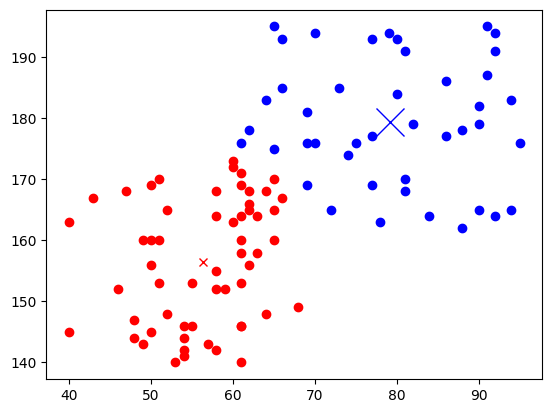

In [42]:
plt.plot([d[0] for d in group1],
         [d[1] for d in group1],'o',color='r')
plt.plot([d[0] for d in group2],
         [d[1] for d in group2],'o',color='b')
plt.plot(c1[0], c1[1], 'x', color='b', markersize=20) #컬러
plt.plot(c2[0], c2[1], 'x', color='r') 